In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
new_predictions = pd.read_csv("D:/Football Project/ProWorth/predicted_market_values_2026.csv")
players=pd.read_csv("D:/Football Project/ProWorth/merged_df.csv")
more_info=pd.read_csv("D:\Football Project\Datasets\players.csv")
df = pd.merge(new_predictions, players, on='player_id', how='left')
df = df.merge(more_info[['player_id', 'image_url']], on='player_id', how='left')

In [39]:
df

,player_id,name_x,predicted_value_2026,value_2018,value_2019,value_2020,value_2021,value_2022,value_2023,value_2024,...,name_y,injuries_2019.0,injuries_2020.0,injuries_2021.0,injuries_2022.0,injuries_2023.0,injuries_2024.0,country_of_citizenship_encoded,sub_position_encoded,image_url
0,3333,James Milner,4.735517e+05,15000000.0,15000000.0,8000000.0,3000000.0,2000000.0,1500000.0,1000000.0,...,James Milner,1.0,6.0,3.0,2.0,1.0,0.0,37,1,https://img.a.transfermarkt.technology/portrai...
1,4391,Boy Waterman,2.128981e+04,600000.0,300000.0,250000.0,200000.0,100000.0,75000.0,50000.0,...,Boy Waterman,0.0,0.0,0.0,1.0,0.0,0.0,81,5,https://img.a.transfermarkt.technology/portrai...
2,9500,David Marshall,1.522317e+04,2000000.0,1500000.0,500000.0,250000.0,250000.0,200000.0,50000.0,...,David Marshall,0.0,0.0,1.0,0.0,1.0,0.0,98,5,https://img.a.transfermarkt.technology/portrai...
3,12029,Ludovic Butelle,6.202312e+04,500000.0,500000.0,250000.0,250000.0,100000.0,100000.0,100000.0,...,Ludovic Butelle,0.0,0.0,0.0,0.0,0.0,0.0,41,5,https://img.a.transfermarkt.technology/portrai...
4,12359,Niki Mäenpää,3.684105e+04,250000.0,500000.0,250000.0,200000.0,200000.0,100000.0,75000.0,...,Niki Mäenpää,0.0,0.0,3.0,2.0,2.0,0.0,40,5,https://img.a.transfermarkt.technology/portrai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,552057,Adam Hlozek,1.309114e+07,200000.0,7500000.0,12000000.0,19000000.0,20000000.0,18000000.0,18000000.0,...,Adam Hlozek,1.0,3.0,2.0,0.0,1.0,0.0,31,12,https://img.a.transfermarkt.technology/portrai...
4474,564785,Kristian Thorstvedt,6.430555e+06,400000.0,1000000.0,2000000.0,6000000.0,8500000.0,7500000.0,8000000.0,...,Kristian Thorstvedt,0.0,2.0,1.0,0.0,1.0,0.0,87,0,https://img.a.transfermarkt.technology/portrai...
4475,585339,Pape Habib Guèye,8.201100e+05,250000.0,500000.0,750000.0,1200000.0,1500000.0,700000.0,1000000.0,...,Pape Habib Guèye,0.0,0.0,1.0,0.0,0.0,0.0,99,3,https://img.a.transfermarkt.technology/portrai...
4476,551505,Mousa Tamari,8.551028e+06,1500000.0,2000000.0,2000000.0,1500000.0,1800000.0,6000000.0,8000000.0,...,Mousa Tamari,0.0,0.0,0.0,0.0,1.0,0.0,63,10,https://img.a.transfermarkt.technology/portrai...


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11768\2451094638.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11768\2451094638.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"€{x/1e6:.1f}M" for x in ax.get_yticks()], fontsize=14, fontweight='bold', color='#555555')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11768\2451094638.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


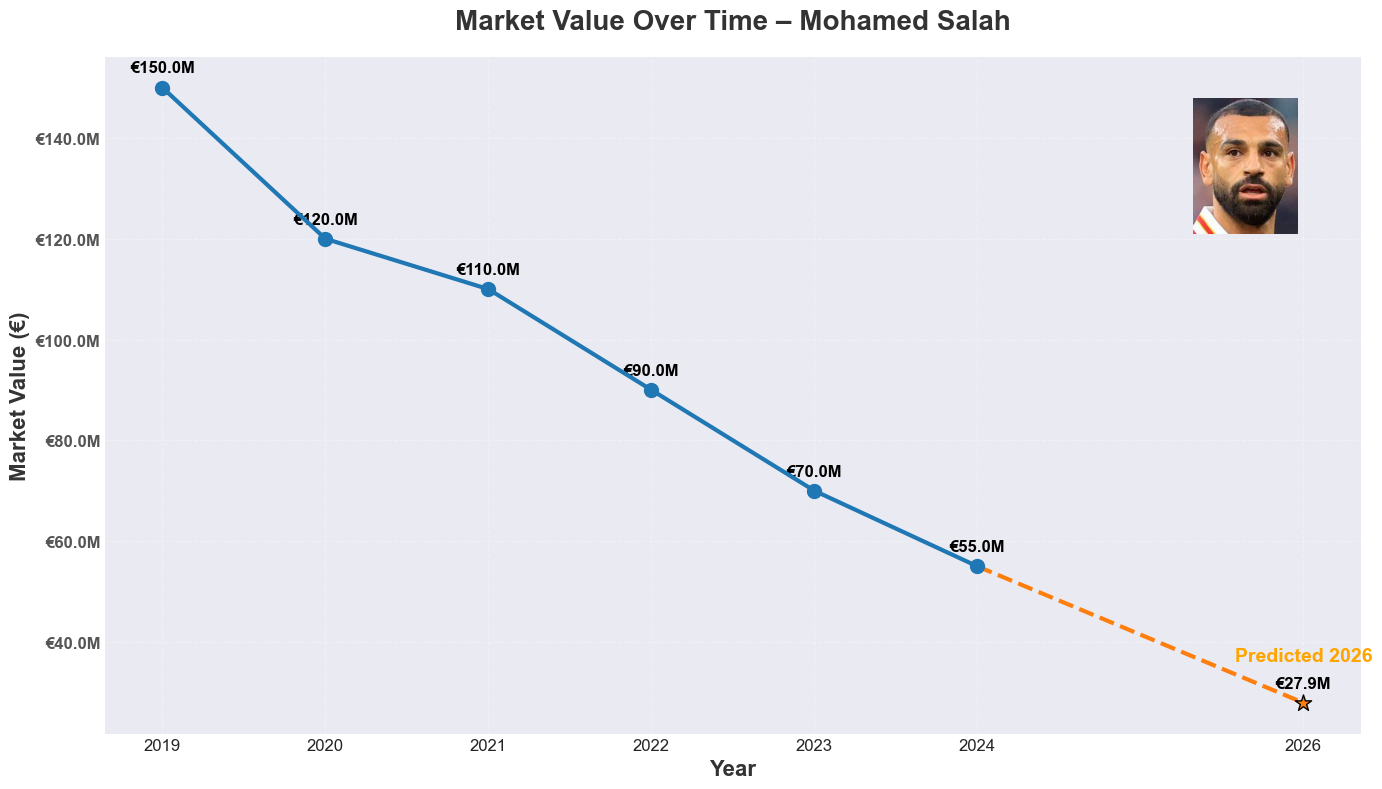

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

# Select player
player_id = 148455
player_data = df[df['player_id'] == player_id].iloc[0]
player_name = player_data['name_x']

# Extract year-wise market values including prediction
years = [2019, 2020, 2021, 2022, 2023, 2024, 2026]
values = [
    player_data['value_2019'],
    player_data['value_2020'],
    player_data['value_2021'],
    player_data['value_2022'],
    player_data['value_2023'],
    player_data['value_2024'],
    player_data['predicted_value_2026']
]

# Plot setup
plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots(figsize=(14, 8))

# Plot actual values
ax.plot(years[:-1], values[:-1], marker='o', linestyle='-', color='#1f77b4', linewidth=3, markersize=10, label="Actual", zorder=5)

# Plot prediction for 2026
ax.plot(years[-2:], values[-2:], linestyle='--', color='#FF7F0E', linewidth=3, label="Prediction", zorder=3)
ax.scatter(years[-1], values[-1], color='#FF7F0E', s=150, marker='*', edgecolor='black', zorder=6)

# Add value labels in millions with cleaner font and spacing
for x, y in zip(years, values):
    label = f"€{y/1e6:.1f}M"
    ax.text(x, y + 0.02 * max(values), label, fontsize=12, ha='center', fontweight='bold', color='black')

# Annotate prediction with a sleek arrow and shadow effect
ax.annotate("Predicted 2026", xy=(2026, values[-1]), xytext=(2026, values[-1] + 0.05 * max(values)),
            fontsize=14, color='orange', fontweight='bold', ha='center', va='bottom')

# Title and labels with professional font and boldness
ax.set_title(f"Market Value Over Time – {player_name}", fontsize=20, fontweight='bold', pad=20, color='#333333')
ax.set_xlabel("Year", fontsize=16, fontweight='bold', color='#333333')
ax.set_ylabel("Market Value (€)", fontsize=16, fontweight='bold', color='#333333')
ax.set_xticks(years)
ax.set_yticklabels([f"€{x/1e6:.1f}M" for x in ax.get_yticks()], fontsize=14, fontweight='bold', color='#555555')
ax.tick_params(axis='both', labelsize=12)

# Add subtle grid lines and fine-tune layout
ax.grid(True, linestyle='--', alpha=0.3)

# Add player image in top-right corner, with a clean border
img_url = player_data['image_url']
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Set image size smaller and position it at the top-right corner
img_ax = fig.add_axes([0.81, 0.70, 0.12, 0.17], anchor='NE', zorder=7)
img_ax.imshow(img)
img_ax.axis('off')

# Tight layout to avoid overlaps
plt.tight_layout()
plt.show()
